## Imports and Read Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
df = pd.read_csv("playoff_data.csv", index_col=False)
df.index = range(1,len(df)+1)
df.tail(5)

,Away,Home,Away Q1,Away Q2,Away Q3,Away Q4,Home Q1,Home Q2,Home Q3,Home Q4
530,Cleveland Browns,Kansas City Chiefs,3,3,0,7,6,9,2,2
531,Tampa Bay Buccaneers,New Orleans Saints,0,3,0,0,6,3,0,0
532,Buffalo Bills,Kansas City Chiefs,9,2,5,4,0,1,1,8
533,Tampa Bay Buccaneers,Green Bay Packers,7,1,8,1,0,0,3,6
534,Tampa Bay Buccaneers,Kansas City Chiefs,7,1,1,1,3,6,9,9


## Create Boards - Home team on x-axis, Away team on y-axis

In [3]:
# create empty board for each quarter
q1_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q2_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q3_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q4_sum = pd.DataFrame(0, index=range(10), columns=range(10))

# populate quarter summary dataFrames and total summary df
for i in range(len(df["Away"])):
    q1_sum[df["Home Q1"].iloc[i]][df["Away Q1"].iloc[i]] += 1
    q2_sum[df["Home Q2"].iloc[i]][df["Away Q2"].iloc[i]] += 1
    q3_sum[df["Home Q3"].iloc[i]][df["Away Q3"].iloc[i]] += 1
    q4_sum[df["Home Q4"].iloc[i]][df["Away Q4"].iloc[i]] += 1

total_sum = (q1_sum + q2_sum + q3_sum + q4_sum)   

## How many squares have not won by quarter

In [4]:
q1_zeroes = ((q1_sum == 0).sum()).sum()
q2_zeroes = ((q2_sum == 0).sum()).sum()
q3_zeroes = ((q3_sum == 0).sum()).sum()
q4_zeroes = ((q4_sum == 0).sum()).sum()
zeroes = ((total_sum == 0).sum()).sum()

print(f"{q1_zeroes} squares have never won a first quarter")
print(f"{q2_zeroes} squares have never won a second quarter")
print(f"{q3_zeroes} squares have never won a third quarter")
print(f"{q4_zeroes} squares have never won a fourth quarter")
print(f"{zeroes} squares have never won any quarter")

63 squares have never won a first quarter
32 squares have never won a second quarter
15 squares have never won a third quarter
5 squares have never won a fourth quarter
2 squares have never won any quarter


## Which squares have never won any quarter?

<AxesSubplot:>

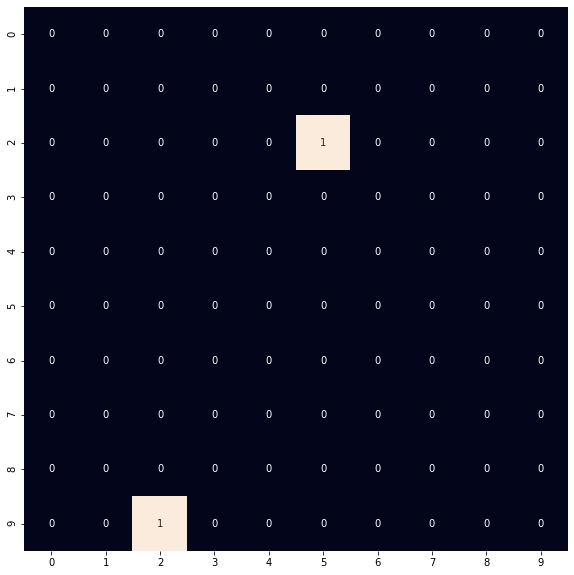

In [5]:
zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_sum[i][j] == 0):
            zero_sum[i][j] += 1

# show heatmap - 1 represents winless squares
plt.figure(figsize = (10,10))
sns.heatmap(zero_sum, annot=True, square=True, cbar=False)

## Which squares have never won by quarter?

<AxesSubplot:>

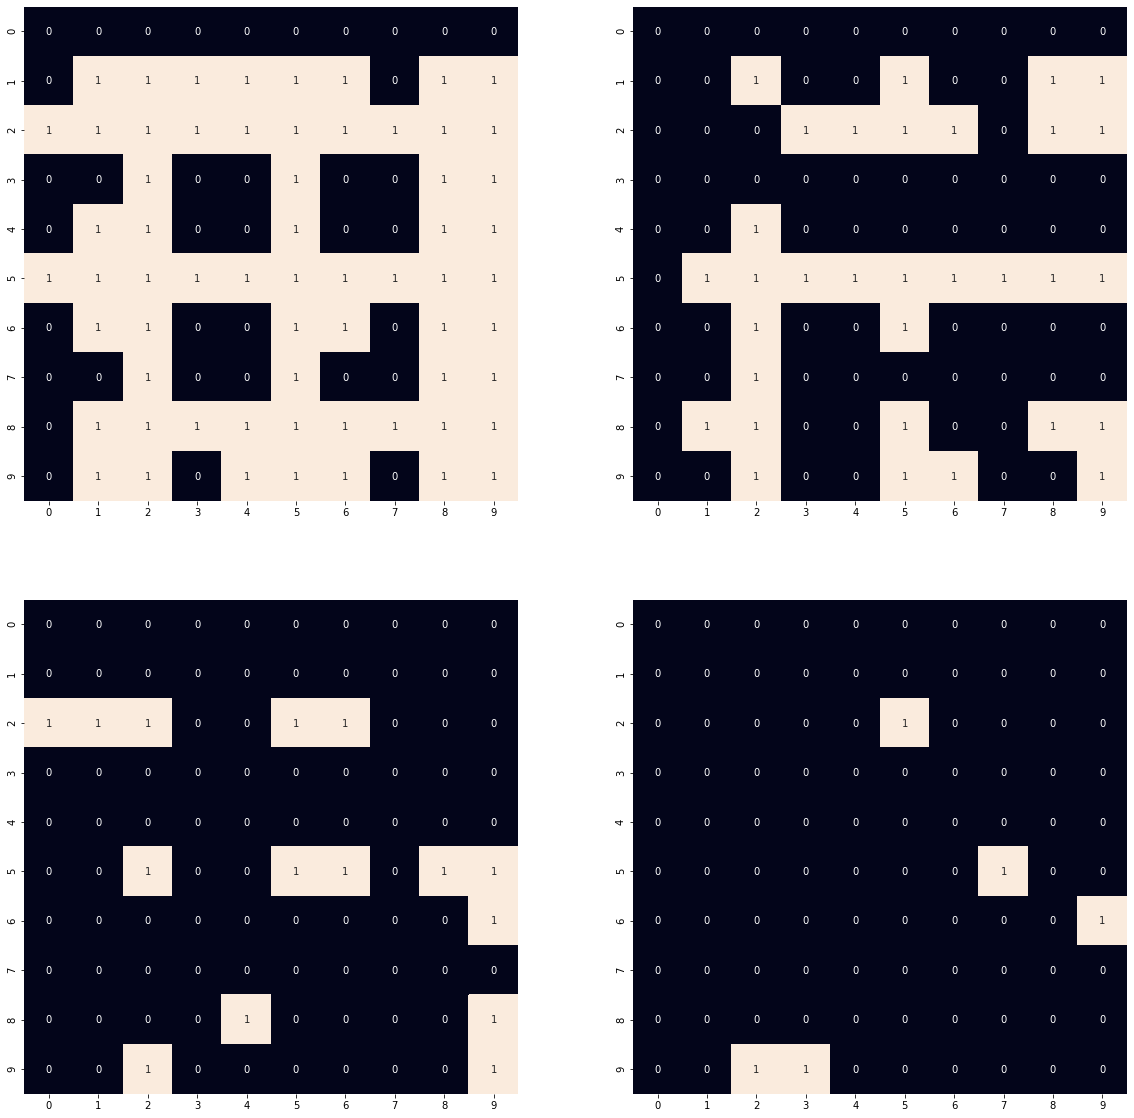

In [6]:
q1_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q2_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q3_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
q4_zero_sum = pd.DataFrame(0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(q1_sum[i][j] == 0):
            q1_zero_sum[i][j] += 1
        if(q2_sum[i][j] == 0):
            q2_zero_sum[i][j] += 1
        if(q3_sum[i][j] == 0):
            q3_zero_sum[i][j] += 1
        if(q4_sum[i][j] == 0):
            q4_zero_sum[i][j] += 1
            
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_zero_sum, ax=ax1, annot=True, square=True, cbar=False)
sns.heatmap(q2_zero_sum, ax=ax2, annot=True, square=True, cbar=False)
sns.heatmap(q3_zero_sum, ax=ax3, annot=True, square=True, cbar=False)
sns.heatmap(q4_zero_sum, ax=ax4, annot=True, square=True, cbar=False)

## How many squares have an above average expected value?
**Assuming \$5 per square with 25\% percent payout at the end of each quarter**

14 squares have an above average expected value
The sum of their expected values is: $302.43, which is 60.49% of the total winnings


<AxesSubplot:>

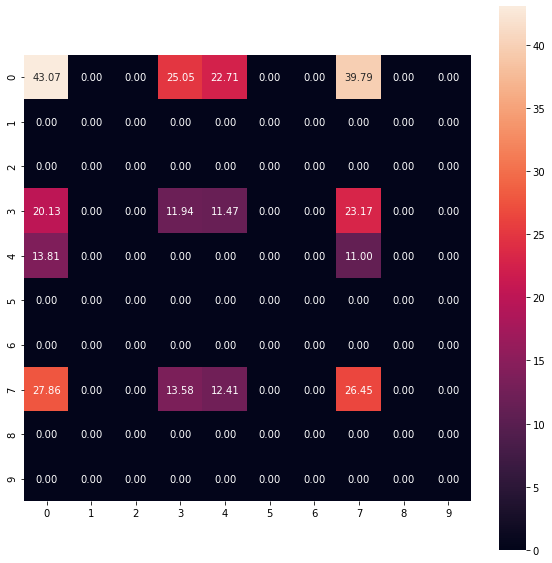

In [7]:
# ev = (occurance/total_occurances)*payout
q1_ev = q1_sum/len(df) * 125
q2_ev = q2_sum/len(df) * 125
q3_ev = q3_sum/len(df) * 125
q4_ev = q4_sum/len(df) * 125
total_ev = q1_ev + q2_ev + q3_ev + q4_ev

above_avg_by_col = (total_ev > 10).sum()
above_avg = above_avg_by_col.sum()
print(f"{above_avg} squares have an above average expected value")  

count = 0
above_avg_df = pd.DataFrame(0.0, index=range(10), columns=range(10))
for i in range(10):
    for j in range(10):
        if(total_ev[i][j] > 10):
            above_avg_df[i][j] += total_ev[i][j]
            count += total_ev[i][j]
            
count_percent = round(100*count/500,2)
print(f"The sum of their expected values is: ${round(count,2)}, which is {count_percent}% of the total winnings")

plt.figure(figsize = (10,10))
sns.heatmap(above_avg_df, annot=True, square=True, fmt='.2f')

## Number of occurances by quarter
Top left: 1st Quarter------Top right: 2nd Quarter  
Bottom left: 3rd Quarter------Bottom right: 4th quarter  

<AxesSubplot:>

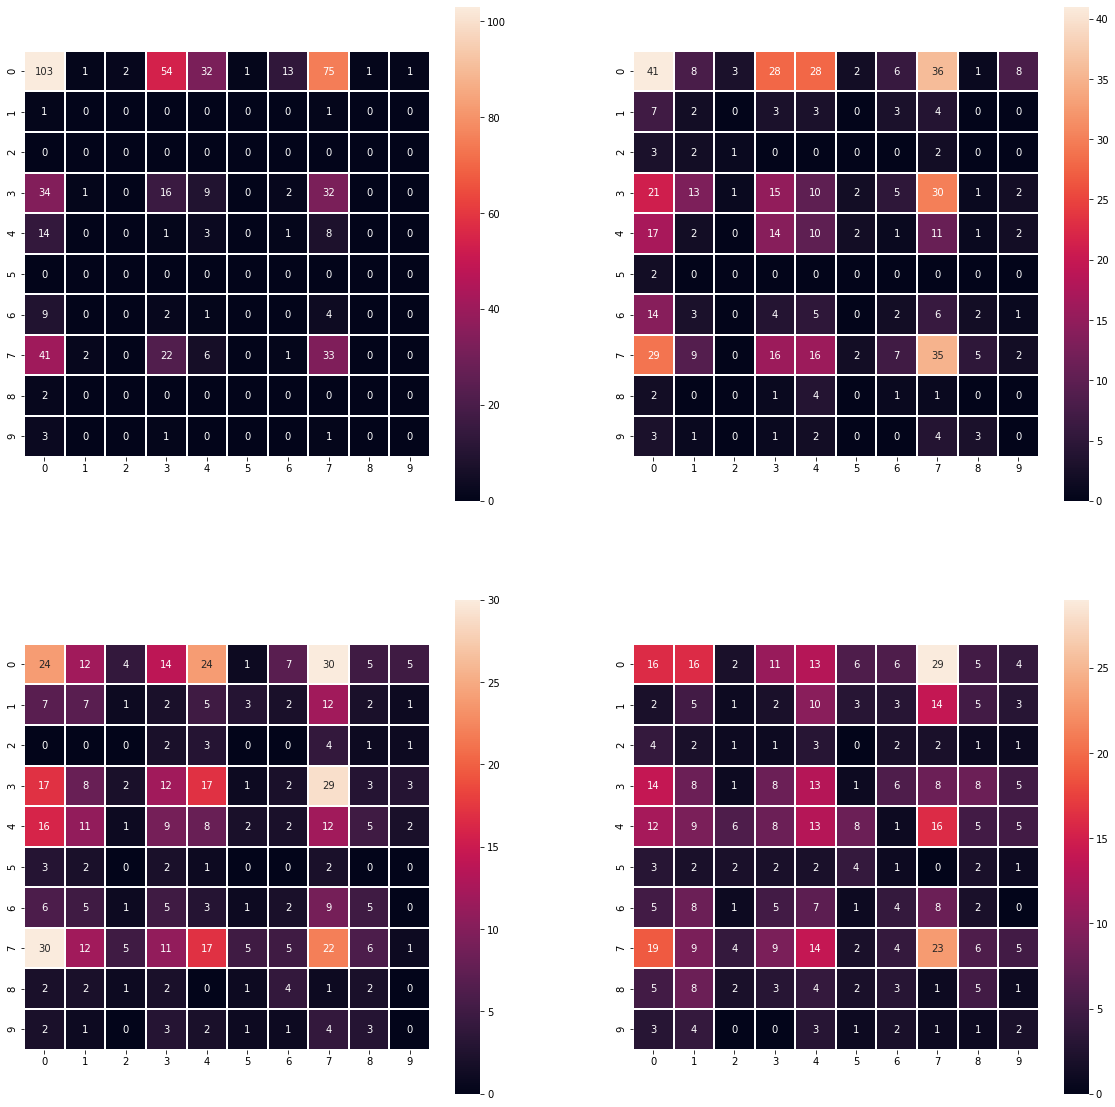

In [8]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_sum, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')
sns.heatmap(q2_sum, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q3_sum, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True)
sns.heatmap(q4_sum, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True)

## Overall number of occurances

<AxesSubplot:>

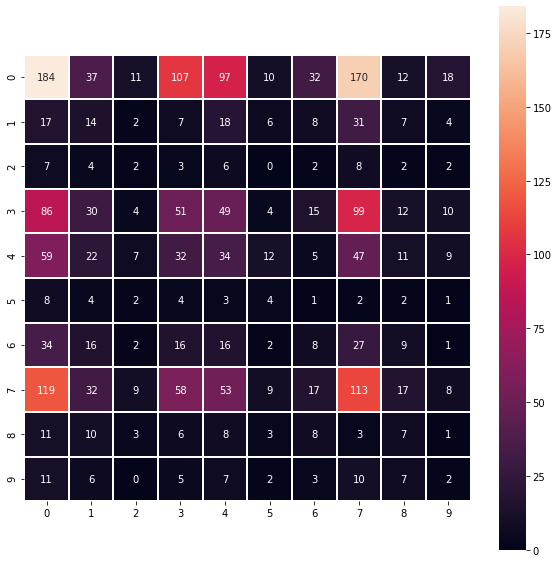

In [9]:
fig, ax = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_sum, ax=ax, annot=True, linewidth=1, linecolor='w', square=True, fmt='.3g')

## Expected values for individual quarters

<AxesSubplot:>

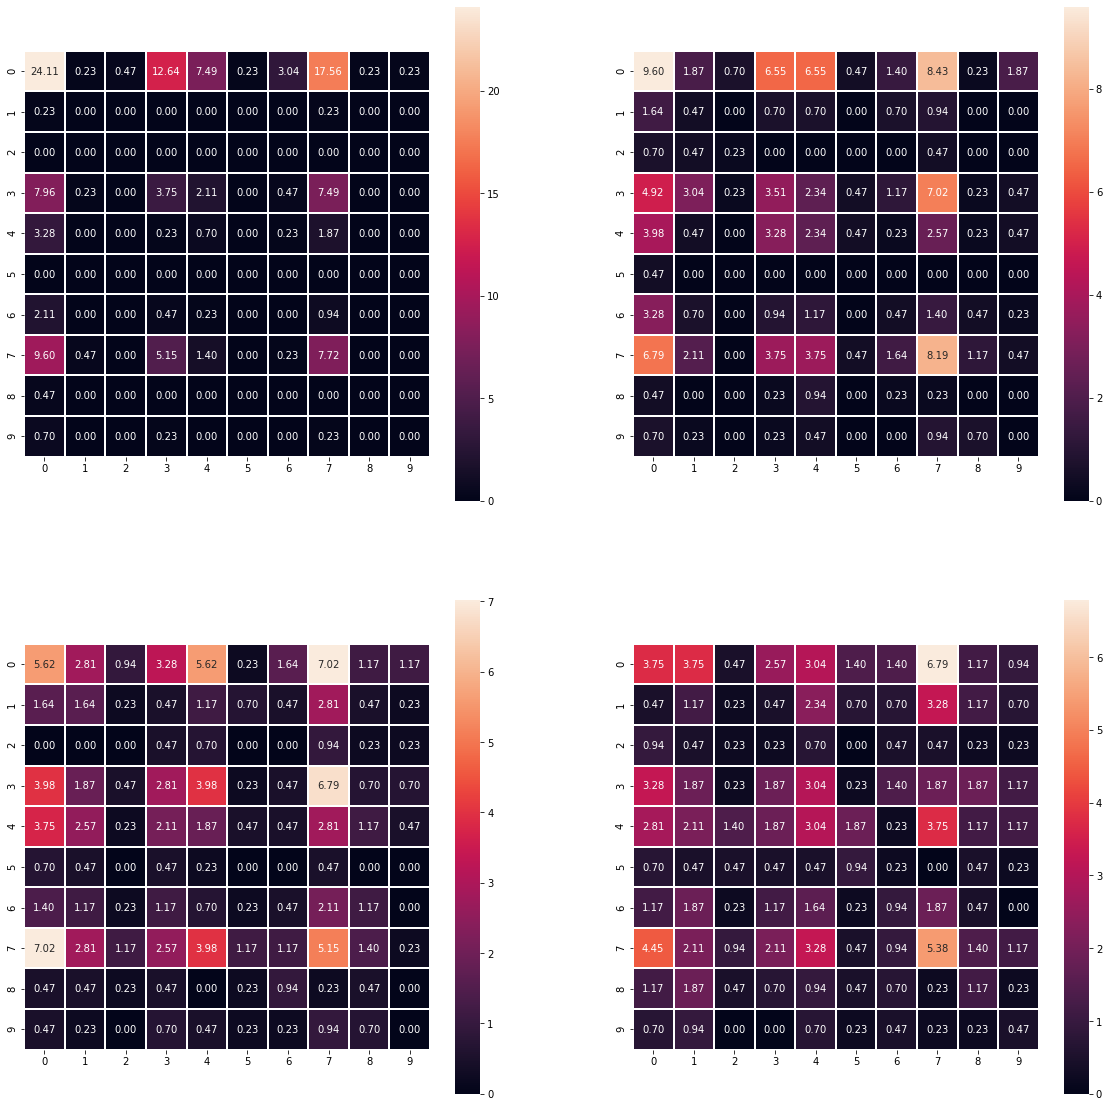

In [10]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(20,20))
sns.heatmap(q1_ev, ax=ax1, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q2_ev, ax=ax2, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q3_ev, ax=ax3, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')
sns.heatmap(q4_ev, ax=ax4, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')

## Overall expected values

<AxesSubplot:>

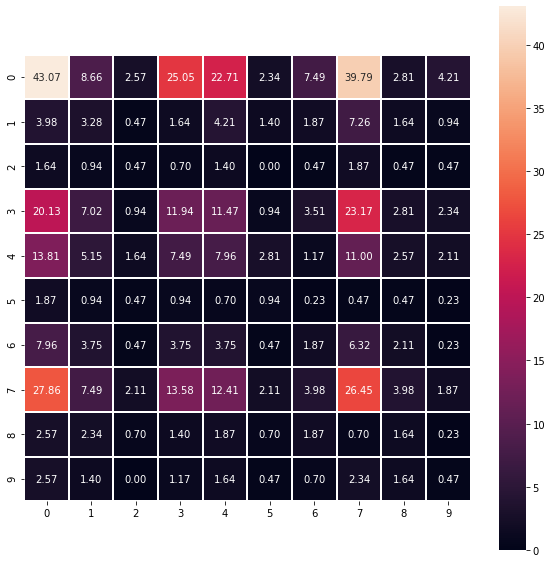

In [11]:
fig2, ax5 = plt.subplots(1, figsize=(10,10))
sns.heatmap(total_ev, ax=ax5, annot=True, linewidth=1, linecolor='w', square=True, fmt='.2f')

## Is it better to have a square with a 0 for Home or 0 for Away?

In [12]:
home_zero_ev = total_ev[0].sum()
away_zero_ev = total_ev.iloc[0].sum()
diff = home_zero_ev - away_zero_ev 
if(diff > 0):
    print(f"Home 0 had an expected value {round(diff,2)} higher than Away 0")
else:
    print(f"Away 0 had an expected value {round(-1*diff,2)} higher than Home 0")

Away 0 had an expected value 33.24 higher than Home 0


## What about every individual number?

In [13]:
for i in range(10):
    home_ev = total_ev[i].sum()
    away_ev = total_ev.iloc[i].sum()
    diff = home_ev - away_ev
    if(diff > 0):
        print(f"Home {i} had an expected value {round(diff,2)} higher than Away {i}")
    else:
        print(f"Away {i} had an expected value {round(-1*diff,2)} higher than Home {i}")

Away 0 had an expected value 33.24 higher than Home 0
Home 1 had an expected value 14.28 higher than Away 1
Home 2 had an expected value 1.4 higher than Away 2
Away 3 had an expected value 16.62 higher than Home 3
Home 4 had an expected value 12.41 higher than Away 4
Home 5 had an expected value 4.92 higher than Away 5
Away 6 had an expected value 7.49 higher than Home 6
Home 7 had an expected value 17.56 higher than Away 7
Home 8 had an expected value 6.09 higher than Away 8
Home 9 had an expected value 0.7 higher than Away 9
